In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter

In [2]:
tweets = pd.read_csv('train.csv')

<Axes: >

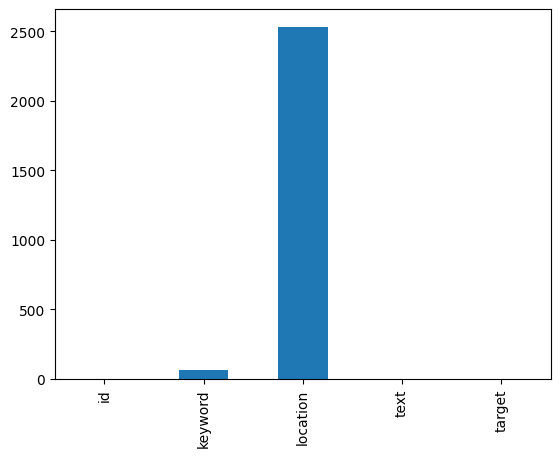

In [5]:
tweets.isnull().sum().plot(kind='bar')

Location has lots of NaN values and would not be a good/useful feature, unless we have a priori knowledge of where a disaster occured. Furthermore, some of them are not in the correct format, so it will be quite time consuming to clean it. 

Keyword has NaNs as well, but can be imputed with 'None'.

# Distribution of Character, Word and Sentence Frequency

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shasa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [16]:
# count number of characters in each tweet
tweets['char_len'] = tweets.text.str.len()

# count number of words in each tweet
word_tokens = [len(word_tokenize(tweet)) for tweet in tweets.text]
tweets['word_len'] = word_tokens

# count number of sentence in each tweet
sent_tokens = [len(sent_tokenize(tweet)) for tweet in tweets.text]
tweets['sent_len'] = sent_tokens

C:\Users\shasa\AppData\Local\Temp\ipykernel_14188\2601523167.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tweets[tweets.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
C:\Users\shasa\AppData\Local\Temp\ipykernel_14188\2601523167.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

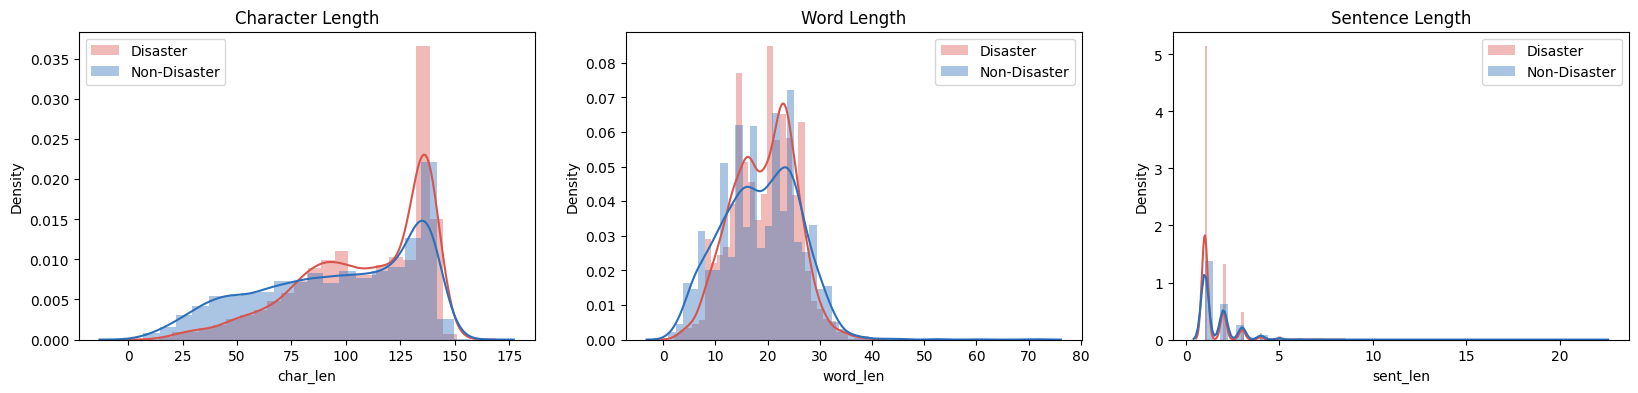

In [17]:
plot_cols = ['char_len','word_len','sent_len']
plot_titles = ['Character Length','Word Length','Sentence Length']

plt.figure(figsize=(20,4))
for counter, i in enumerate([0,1,2]):
    plt.subplot(1,3,counter+1)
    sns.distplot(tweets[tweets.target == 1][plot_cols[i]], label='Disaster', color=color[1]).set_title(plot_titles[i])
    sns.distplot(tweets[tweets.target == 0][plot_cols[i]], label='Non-Disaster', color=color[0])
    plt.legend()

In [18]:
# Investigate the Outliers
tweets[tweets.sent_len > 8]
tweets[tweets.word_len > 50]

,id,keyword,location,text,target,char_len,word_len,sent_len
362,520,army,Pakistan,.: .: .: .: .: .: .: .: .: .: .: .: .: .: .: ....,0,140,53,22
830,1207,blizzard,NaN,the best thing at DQ is the cotton candy blizz...,0,100,60,3
1270,1832,burned,NaN,when you're taking a shower and someone flushe...,0,157,72,2
4929,7023,mayhem,?? Made in the Philippines ??,_\n?????RETWEET\n???????\n?????FOLLOW ALL WHO ...,0,145,70,20
4949,7053,meltdown,? miranda ? 521 mi,@kinkyconnors IM sorry for my meltdown last ni...,0,127,52,3


Some of the outliers such as sentence length > 10 consist of a lot of punctuations. I left it unchanged as I feel that a  tweet with a many sentences, which is indicative of many punctuations, suggest that it is not a serious tweet (about a disaster). Of course there might be some instances where a disaster tweet consists of multiple punctuations (e.g. a volvano just erupted!!!!!!!!!!!!) but that is not very frequent.


<a id='Top_Stopwords'></a>
## 2.2. Top Most Common Stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shasa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
## Plot most common stopwords
stop = set(stopwords.words('english'))

# Get all the word tokens in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in tweets[tweets.target == 0].text for word in word_tokenize(tweet)]
corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in tweets[tweets.target == 1].text for word in word_tokenize(tweet)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [23]:
# Function for counting top stopwords in a corpus
def count_top_stopwords(corpus):
    stopwords_freq = {}
    for word in corpus:
        if word in stop: 
            if word in stopwords_freq:
                stopwords_freq[word] += 1
            else:
                stopwords_freq[word] = 1
    topwords = sorted(stopwords_freq.items(), key=lambda item: item[1], reverse=True)[:10] # get the top 10 stopwords
    x,y = zip(*topwords) # get key and values
    return x,y

Text(0.5, 1.0, 'Top Stopwords for  Disaster Tweets')

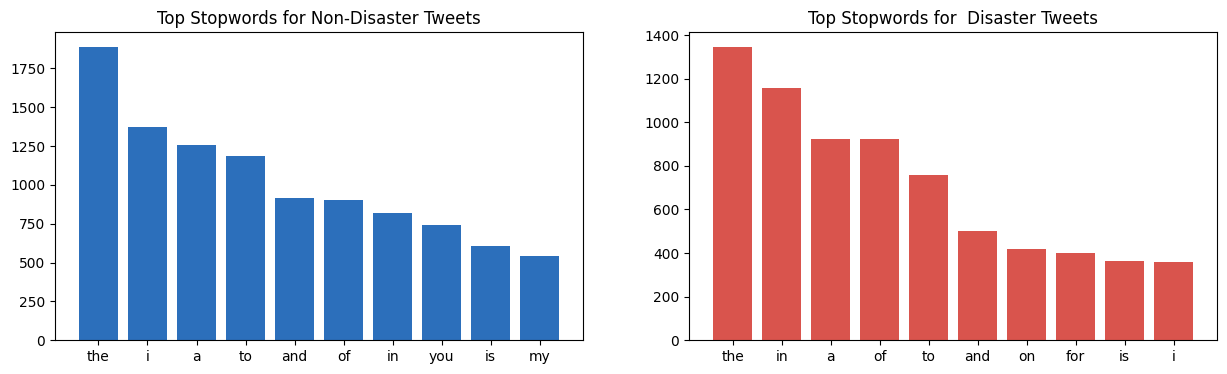

In [24]:
x0,y0 = count_top_stopwords(corpus0)
x1,y1 = count_top_stopwords(corpus1)

# Plot bar plot of top stopwords for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Stopwords for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Stopwords for  Disaster Tweets')

There are lots of occurences of stopwords. These should be removed as they do not predict the target.

<a id='Top_Punc'></a>
## 2.3. Top Most Common Punctuations

In [26]:
# Get all the punctuations in dataframe for Disaster and Non-Disaster
corpus0 = [] # Non-Disaster
[corpus0.append(c) for tweet in tweets[tweets.target == 0].text for c in tweet]
corpus0 = list(filter(lambda x: x in punctuation, corpus0)) # use filter to select only punctuations
corpus1 = [] # Disaster
[corpus1.append(c) for tweet in tweets[tweets.target == 1].text for c in tweet]
corpus1 = list(filter(lambda x: x in punctuation, corpus1)) 

Text(0.5, 1.0, 'Top Punctuations for Disaster Tweets')

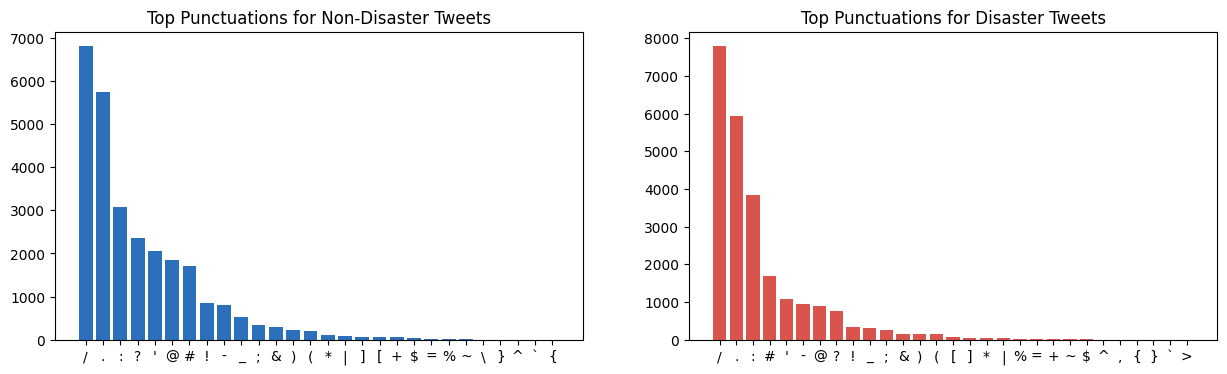

In [27]:
x0,y0 = zip(*Counter(corpus0).most_common())
x1,y1 = zip(*Counter(corpus1).most_common())

# Plot bar plot of top punctuations for each class
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(x0,y0, color=color[0])
plt.title('Top Punctuations for Non-Disaster Tweets')
plt.subplot(1,2,2)
plt.bar(x1,y1, color=color[1])
plt.title('Top Punctuations for Disaster Tweets')

Most common punctuation is the slash, which usually comes from a link ('http://t.co/'). URLs should be removed, as well as most punctuations, with the exception of '!?', which signal some kind of intensity or tonality of the tweet.


<a id='Top_Words'></a>
## 2.4. Top Most Common Words

In [28]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [29]:
stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources

In [30]:
# function for removing url from text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [31]:
# Get all the word tokens in dataframe for Disaster and Non-Disaster
# - remove url, tokenize tweet into words, lowercase words
corpus0 = [] # Non-Disaster
[corpus0.append(word.lower()) for tweet in tweets[tweets.target == 0].text for word in word_tokenize(remove_url(tweet))]
corpus0 = list(filter(lambda x: x not in stop, corpus0)) # use filter to unselect stopwords

corpus1 = [] # Disaster
[corpus1.append(word.lower()) for tweet in tweets[tweets.target == 1].text for word in word_tokenize(remove_url(tweet))]
corpus1 = list(filter(lambda x: x not in stop, corpus1)) # use filter to unselect stopwords

# Create df for word counts to use sns plots
a = Counter(corpus0).most_common()
df0 = pd.DataFrame(a, columns=['Word','Count'])

a = Counter(corpus1).most_common()
df1 = pd.DataFrame(a, columns=['Word','Count'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'news'),
  Text(1, 0, 'disaster'),
  Text(2, 0, 'california'),
  Text(3, 0, 'suicide'),
  Text(4, 0, 'police'),
  Text(5, 0, 'amp'),
  Text(6, 0, 'people'),
  Text(7, 0, 'killed'),
  Text(8, 0, 'like'),
  Text(9, 0, 'hiroshima')])

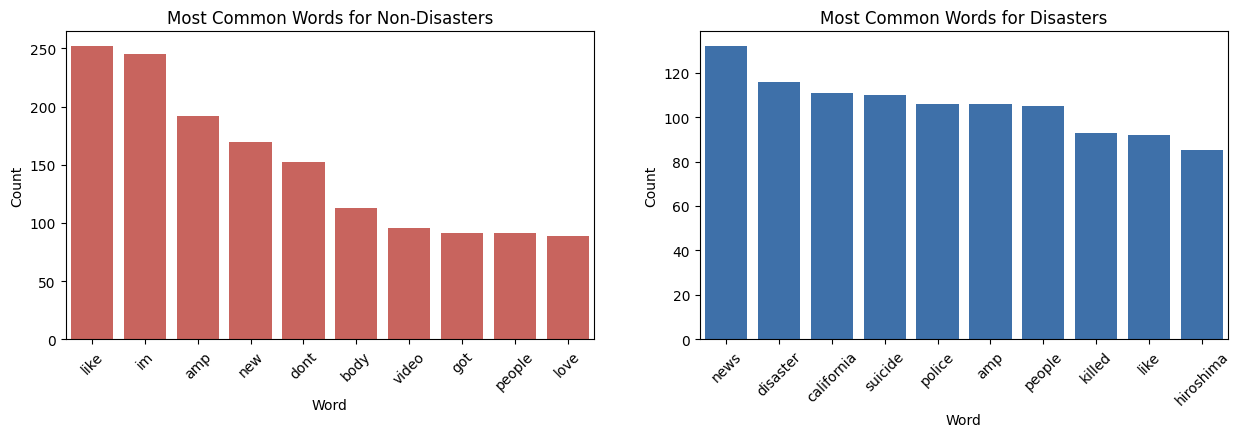

In [32]:
# Plot for Disaster and Non-Disaster
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.barplot(x='Word',y='Count',data=df0.head(10), color=color[1]).set_title('Most Common Words for Non-Disasters')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Word',y='Count',data=df1.head(10), color=color[0]).set_title('Most Common Words for Disasters')
plt.xticks(rotation=45)

Disaster tweets contain more words related to disasters. But still need more cleaning. And what is the word amp? Will need to expand contractions as well such as 'im'.

<a id='Hashtags'></a>
## 2.5. Wordcloud for Hashtags

In [34]:
from wordcloud import WordCloud

In [35]:
def clean(word):
    for p in punctuation: word = word.replace(p, '')
    return word

In [36]:
def wc_hash(target):
    hashtag = [clean(w[1:].lower()) for tweet in tweets[tweets.target == target].text for w in tweet.split() if '#' in w and w[0] == '#']
    hashtag = ' '.join(hashtag)
    my_cloud = WordCloud(background_color='white', stopwords=stop).generate(hashtag)

    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

Text(0.5, 1.0, 'Disaster')

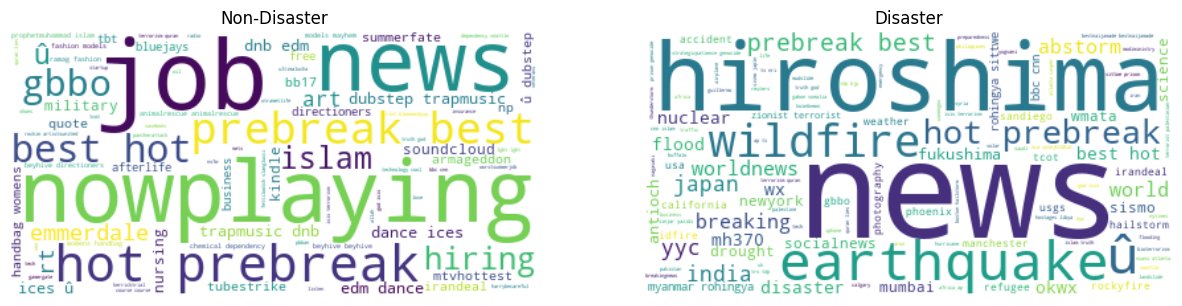

In [37]:
plt.figure(figsize=(15,4))
wc_hash(0)
plt.title('Non-Disaster')
wc_hash(1)
plt.title('Disaster')

<a id='Feature_Engineer'></a>
# 3. Meta-Feature Engineering

Here, we extract some features from the tweets that might give us some idea about whether it is a disaster or not. The purpose of this is to build a feature-based model and use it as part of an ensemble model to improve the predictions of the sequence model. Although it might not perform well on its own, it can  actually boost the performance when combined with other models.

* polarity - range of \[-1,1] where 1 denotes positivity and -1 denotes negativity
* subjectivity - range of \[0,1] where 1 denotes personal opinions and 0 denotes factual info
* exclaimation_num - number of exclamation marks in tweet
* questionmark_num - number of question marks in tweet
* url_num - number of urls in tweet
* hash_num - number of hashtags (#) in tweet
* mention_num - number of mentions (@) in tweet
* contraction_num - number of contractions (e.g I'm, we're, we've)

In [39]:
from textblob import TextBlob

In [40]:
# polarity and subjectivity
tweets['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in tweets.text]
tweets['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in tweets.text]

# exclaimation and question marks
tweets['exclaimation_num'] = [tweet.count('!') for tweet in tweets.text]
tweets['questionmark_num'] = [tweet.count('?') for tweet in tweets.text]

In [41]:
# count number of hashtags and mentions
# Function for counting number of hashtags and mentions
def count_url_hashtag_mention(text):
    urls_num = len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    word_tokens = text.split()
    hash_num = len([word for word in word_tokens if word[0] == '#' and word.count('#') == 1]) # only appears once in front of word 
    mention_num = len([word for word in word_tokens if word[0] == '@' and word.count('@') == 1]) # only appears once in front of word 
    return urls_num, hash_num, mention_num

In [42]:
url_num, hash_num, mention_num = zip(*[count_url_hashtag_mention(tweet) for tweet in tweets.text])
tweets = tweets.assign(url_num = url_num, hash_num = hash_num, mention_num = mention_num)

In [43]:
# count number of contractions
contractions = ["'t", "'re", "'s", "'d", "'ll", "'ve", "'m"]
tweets['contraction_num'] = [sum([tweet.count(cont) for cont in contractions]) for tweet in tweets.text]

<a id='Data_Clean'></a>
# 4. Text Data Cleaning

This is the most important step of the entire project — text preprocessing/cleaning. This cleans the text into a more 'suitable' form as inputs into the NLP models. For example, URLs might make the text difficult to understand and should be removed when necessary. The choice of whether to remove/clean some words or parts-of-speech is an entire process on its own and sometimes this needs to be experimented. Different models are also able to deal with different kinds of parts-of-speech.

* Replace NaNs with 'None'
* Expand Contractions
* Remove Emojis
* Remove URLs
* Remove Punctuations except '!?' as they convey intensity and tonality of tweet
* Replace 'amp' with 'and'
* Word Segmentaion - segment words such as 'iwould' into 'i' and 'would'
* Lemmatization - reduces inflected words into their root form; verb part-of-speech tag is used here)
* Ngrams Exploration 
* Remove Stopwords
* WordCloud of most commmon words (Unigrams)

In [ ]:
## Replace NaNs with 'None'
tweets.keyword.fillna('None', inplace=True) 

In [45]:
## Expand Contractions
# Function for expanding most common contractions https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
def decontraction(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [46]:
tweets.text = [decontraction(tweet) for tweet in tweets.text]

In [47]:
## Remove Emojis
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [49]:
tweets.text = tweets.text.apply(lambda x: remove_emoji(x))

In [50]:
## Remove URLs
tweets.text = tweets.text.apply(lambda x: remove_url(x))

In [51]:
## Remove Punctuations except '!?'
def remove_punct(text):
    new_punct = re.sub('\ |\!|\?', '', punctuation)
    table=str.maketrans('','',new_punct)
    return text.translate(table)

tweets.text = tweets.text.apply(lambda x: remove_punct(x))

In [52]:
## Replace amp
def replace_amp(text):
    text = re.sub(r" amp ", " and ", text)
    return text

tweets.text = tweets.text.apply(lambda x: replace_amp(x))

Word segmentation takes a long time. So I have commented out the code and loaded the data that has already been segmented beforehand.

In [55]:
from wordsegment import load, segment

In [56]:
load()
tweets.text = tweets.text.apply(lambda x: ' '.join(segment(x)))

In [57]:
#save a checkpoint file as segementation takes time
tweets.to_csv("Checkpoint1.csv",index=False)

In [ ]:
#tweets = pd.read_csv('../input/twitter-logo/tweets_segmented.csv')

In [58]:
from nltk.stem import WordNetLemmatizer

In [60]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shasa\AppData\Roaming\nltk_data...


True

In [61]:
## Lemmatization
lemmatizer = WordNetLemmatizer()
def lemma(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(w.lower(), pos='v') for w in words])

tweets.text = tweets.text.apply(lambda x: lemma(x))

### Ngrams

In [62]:
## Ngrams
from nltk.util import ngrams

In [63]:
def generate_ngrams(text, n):
    words = word_tokenize(text)
    return [' '.join(ngram) for ngram in list(get_data(ngrams(words, n))) if not all(w in stop for w in ngram)] # exclude if all are stopwords

# in newer versions of python, raising StopIteration exception to end a generator, which is used in ngram, is deprecated
def get_data(gen):
    try:
        for elem in gen:
            yield elem
    except (RuntimeError, StopIteration):
        return

In [64]:
# Bigrams

bigrams_disaster = tweets[tweets.target==1].text.apply(lambda x: generate_ngrams(x, 2))
bigrams_ndisaster = tweets[tweets.target==0].text.apply(lambda x: generate_ngrams(x, 2))

bigrams_d_dict = {}
for bgs in bigrams_disaster:
    for bg in bgs:
        if bg in bigrams_d_dict:
            bigrams_d_dict[bg] += 1
        else:
            bigrams_d_dict[bg] = 1

bigrams_d_df = pd.DataFrame(bigrams_d_dict.items(), columns=['Bigrams','Count'])

bigrams_nd_dict = {}
for bgs in bigrams_ndisaster:
    for bg in bgs:
        if bg in bigrams_nd_dict:
            bigrams_nd_dict[bg] += 1
        else:
            bigrams_nd_dict[bg] = 1            

bigrams_nd_df = pd.DataFrame(bigrams_nd_dict.items(), columns=['Bigrams','Count'])

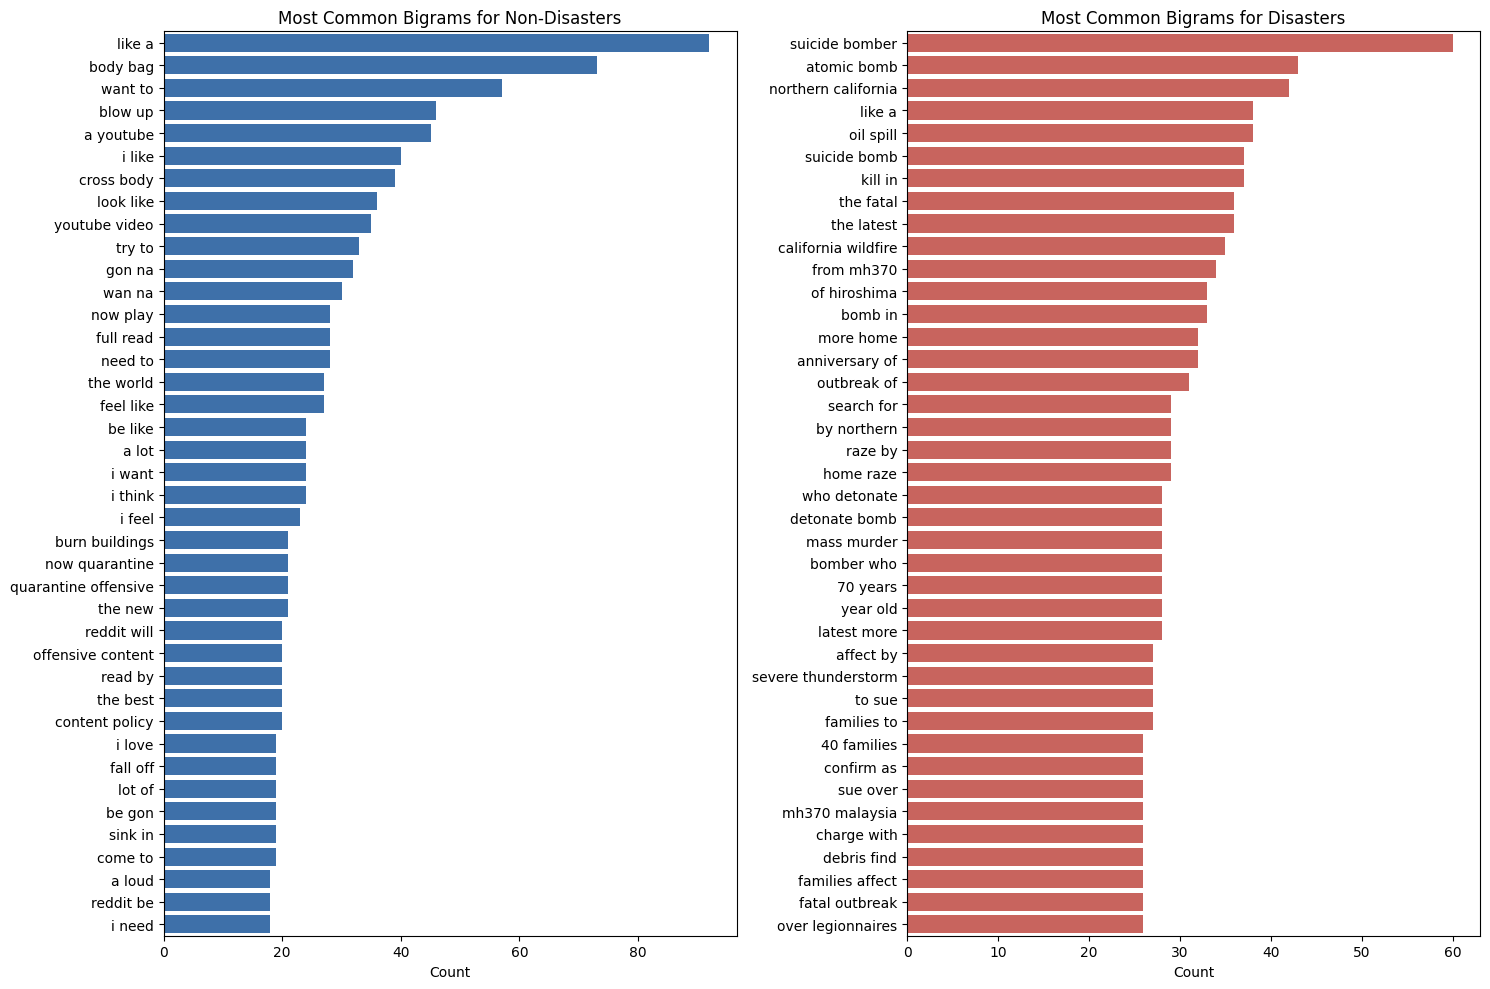

In [65]:
# Barplots for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Bigrams',data=bigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Bigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Bigrams',data=bigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Bigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

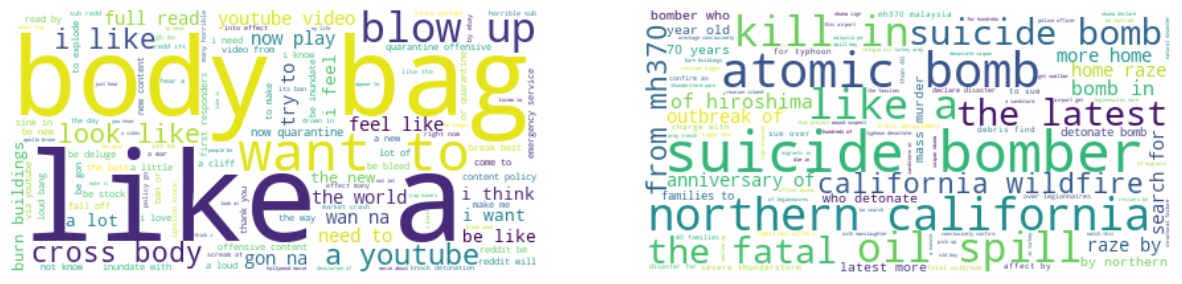

In [66]:
# Woudcloud for bigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_nd_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,2,2)
my_cloud = WordCloud(background_color='white', stopwords=stop).generate_from_frequencies(bigrams_d_dict)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [67]:
# Trigrams

trigrams_disaster = tweets[tweets.target==1].text.apply(lambda x: generate_ngrams(x, 3))
trigrams_ndisaster = tweets[tweets.target==0].text.apply(lambda x: generate_ngrams(x, 3))

trigrams_d_dict = {}
for tgs in trigrams_disaster:
    for tg in tgs:
        if tg in trigrams_d_dict:
            trigrams_d_dict[tg] += 1
        else:
            trigrams_d_dict[tg] = 1

trigrams_d_df = pd.DataFrame(trigrams_d_dict.items(), columns=['Trigrams','Count'])

trigrams_nd_dict = {}
for tgs in trigrams_ndisaster:
    for tg in tgs:
        if tg in trigrams_nd_dict:
            trigrams_nd_dict[tg] += 1
        else:
            trigrams_nd_dict[tg] = 1            

trigrams_nd_df = pd.DataFrame(trigrams_nd_dict.items(), columns=['Trigrams','Count'])

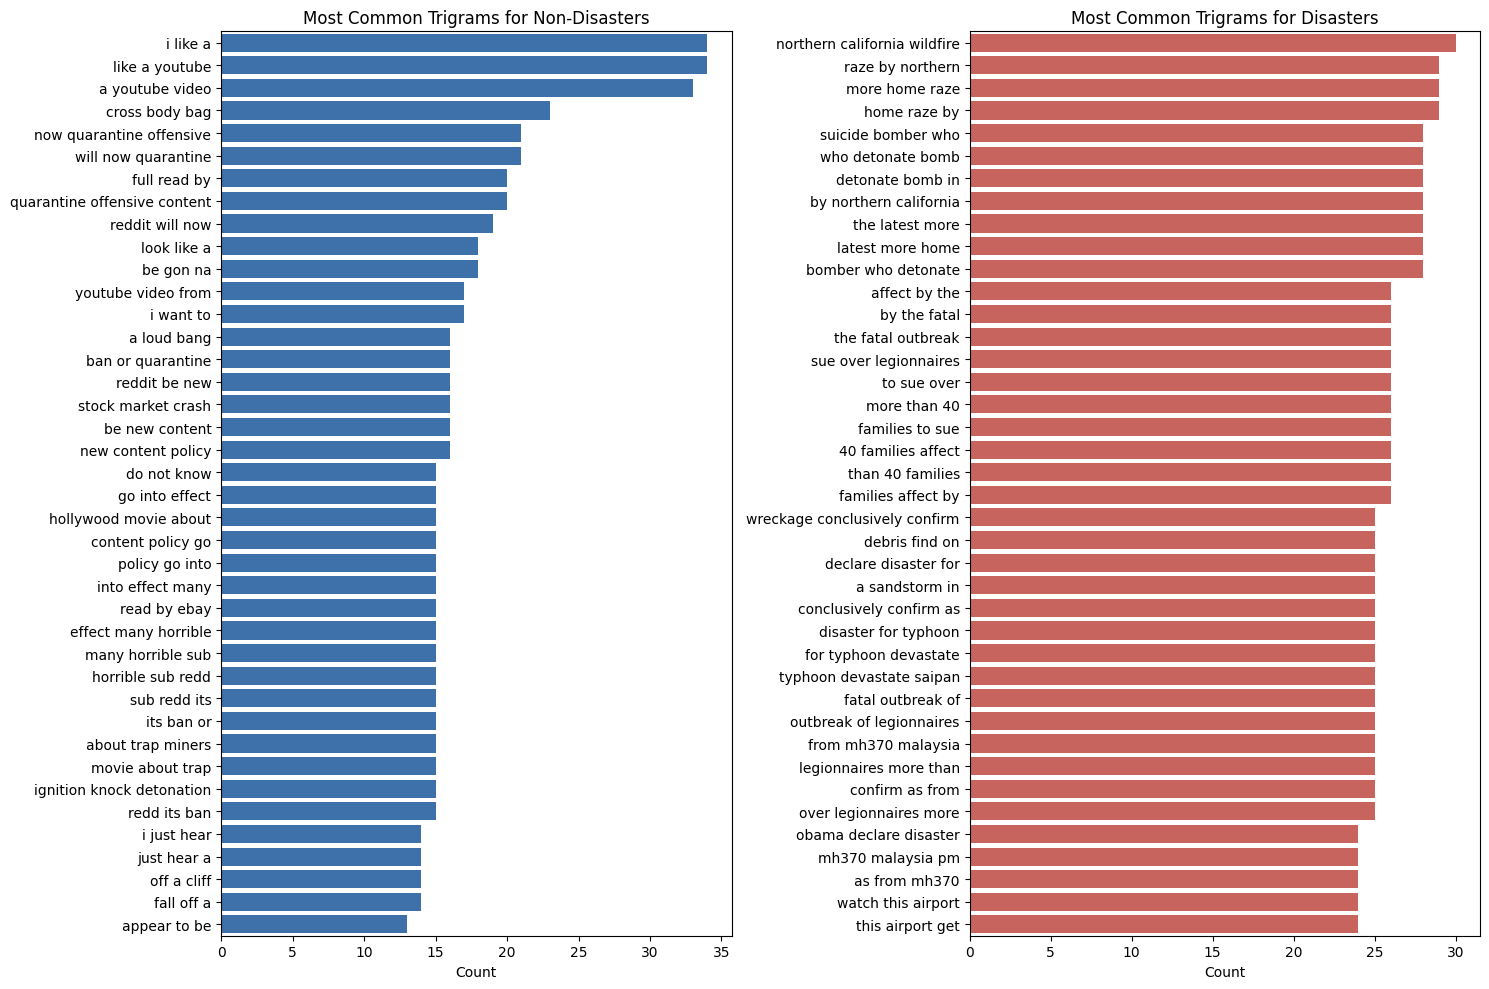

In [68]:
# Barplots for trigrams

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(x='Count',y='Trigrams',data=trigrams_nd_df.sort_values('Count', ascending=False).head(40), color=color[0]).set_title('Most Common Trigrams for Non-Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.subplot(1,2,2)
sns.barplot(x='Count',y='Trigrams',data=trigrams_d_df.sort_values('Count', ascending=False).head(40), color=color[1]).set_title('Most Common Trigrams for Disasters')
ax = plt.gca()
ax.set_ylabel('')
plt.tight_layout()
plt.show()

In [69]:
## Remove Stopwords
def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    return ' '.join([w.lower() for w in word_tokens if not w.lower() in stop])

#tweets_tmp = tweets.copy()
tweets['text_nostopwords'] = tweets.text.apply(lambda x: remove_stopwords(x))


<a id='WC_Cleaned'></a>
## 4.1. WordCloud of Most Common Words after Cleaning

Removed some words such as 'new', 'like' and 'people' as they are common between both targets

In [71]:
from PIL import Image

In [79]:
mask = np.array(Image.open('./Twitter-Logo.png'))
reverse = mask[...,::-1,:]

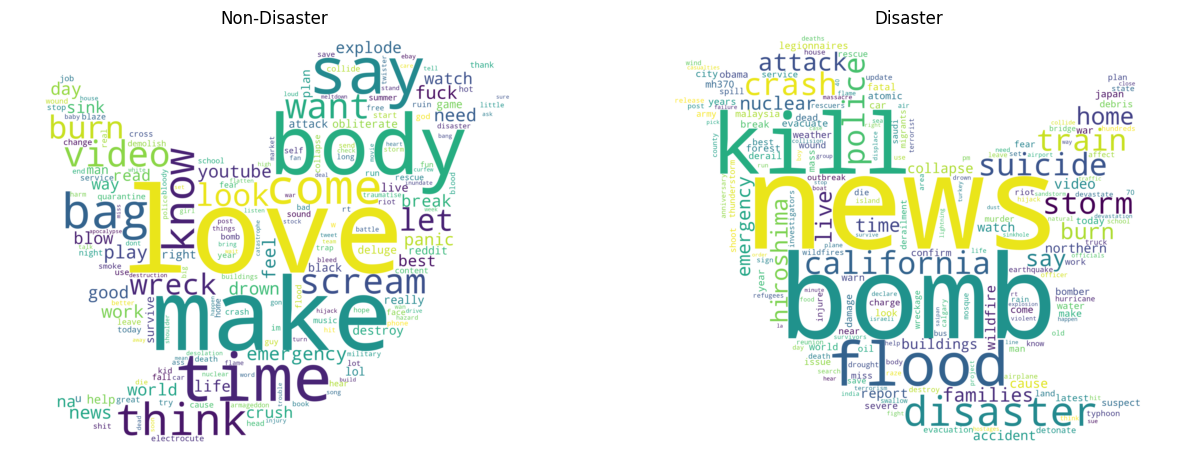

In [80]:
def wc_words(target, mask=mask):
    words = [word.lower() for tweet in tweets[tweets.target == target].text_nostopwords for word in tweet.split()]
    words = list(filter(lambda w: w != 'like', words))
    words = list(filter(lambda w: w != 'new', words))
    words = list(filter(lambda w: w != 'people', words))
    dict = {}
    for w in words:
        if w in dict:
            dict[w] += 1
        else:
            dict[w] = 1
    # plot using frequencies        
    my_cloud = WordCloud(background_color='white', stopwords=stop, mask=mask, random_state=0).generate_from_frequencies(dict) 
    
    plt.subplot(1,2,target+1)
    plt.imshow(my_cloud, interpolation='bilinear') 
    plt.axis("off")

plt.figure(figsize=(15,10))
wc_words(0)
plt.title('Non-Disaster')
wc_words(1, reverse)
plt.title('Disaster')
plt.show()

In [81]:
pd.options.display.max_colwidth = 200
for t in tweets['text'].sample(n=20, random_state=0):
    print(t)
pd.reset_option('max_colwidth')

katie kat cub you already know how this shit go world series or armageddon
lemaire lee dan harmon people near meltdown comics who have free time to wait in line on sunday nights be not a representative sample 140
16tixcalgaryflamesvscol avalanche preseason 929 scotiabank saddledome
if you ever think you run out of choices in life re mbr there be that kid that have no choice but wear a suicide bomb vest
if you do tish to blight your cargo right ahead once it be not mine
electrocute yourself
thief break front window of hicksville store tole50 cell phone flee crash into
do one silver architects have win permission to demolish birmingham be natwest tower and replace it with what will be city s tallest build
fire destroy two buildings on2nd street in manchester
mins uwo on gsi completely understand because i just wake up like 15 minutes ago and im burn
top link reddit be new content policy go into effect many horrible sub redd its ban or quarantine
come later this year the man that tattoo w

In [82]:
pd.reset_option('max_colwidth')
tweets.drop('text_nostopwords', axis=1, inplace=True)
tweets.head()

,id,keyword,location,text,target,char_len,word_len,sent_len,polarity,subjectivity,exclaimation_num,questionmark_num,url_num,hash_num,mention_num,contraction_num
0,1,NaN,NaN,our deeds be the reason of this earthquake may...,1,69,14,1,0.00000,0.0000,0,0,0,1,0,0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38,8,2,0.10000,0.4000,0,0,0,0,0,0
2,5,NaN,NaN,all residents ask to i shelter in place be be ...,1,133,24,2,-0.01875,0.3875,0,0,0,0,0,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65,9,1,0.00000,0.0000,0,0,0,1,0,0
4,7,NaN,NaN,just get send this photo from ruby alaska as s...,1,88,18,1,0.00000,0.0000,0,0,0,2,0,0


In [ ]:
#save tweets

In [83]:
tweets.to_csv("Checkpoint2.csv",index=False)